In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/CodeSoft /Bank Customer Churn Prediction/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9801,9802,15578878,Hancock,569,Spain,Female,30,3,139528.23,1,1,1,33230.37,0
8729,8730,15656592,Toscano,646,Germany,Male,48,8,169023.33,2,1,1,175657.55,0
751,752,15634245,Muecke,758,Germany,Female,47,9,95523.16,1,1,0,73294.48,0
8981,8982,15685805,Ginikanwa,673,Spain,Female,35,6,0.00,2,1,0,98618.79,0
4929,4930,15700601,Dynon,561,France,Male,34,1,78829.53,1,1,1,12148.20,0
17,18,15788218,Henderson,549,Spain,Female,24,9,0.00,2,1,1,14406.41,0
7194,7195,15778290,Lappin,799,France,Male,70,8,70416.75,1,1,1,36483.52,0
1799,1800,15612776,McKay,850,Spain,Female,39,10,0.00,2,1,1,143030.09,0
6612,6613,15615938,Fleming,502,France,Female,64,3,139663.37,1,0,1,100995.11,0
9669,9670,15597739,Tu,674,France,Male,37,3,0.00,1,1,0,158049.90,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.describe(include="all")

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

#Data Visualization

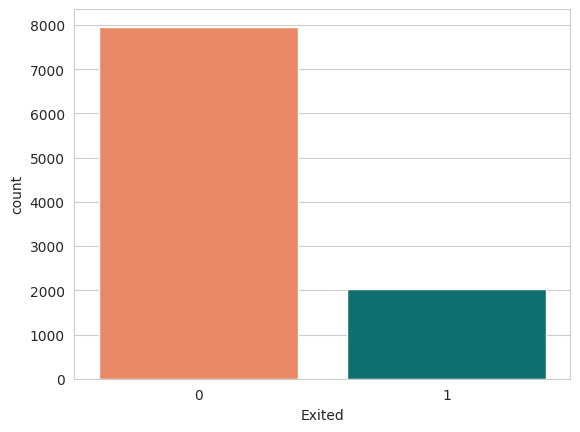

In [ ]:
sns.countplot(x="Exited",data=df,palette=["coral","teal"])
plt.show()

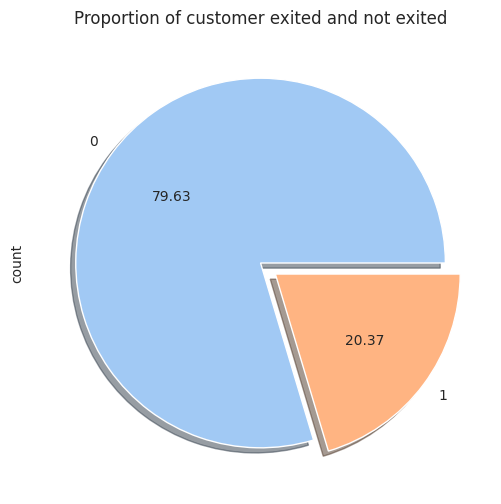

In [ ]:
value_counts = pd.value_counts(df['Exited'])
plt.figure(figsize = (6,6))
value_counts.plot(kind = 'pie', explode = [0,0.1],autopct='%.2f', shadow=True)
plt.title('Proportion of customer exited and not exited')
plt.show()

In [ ]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

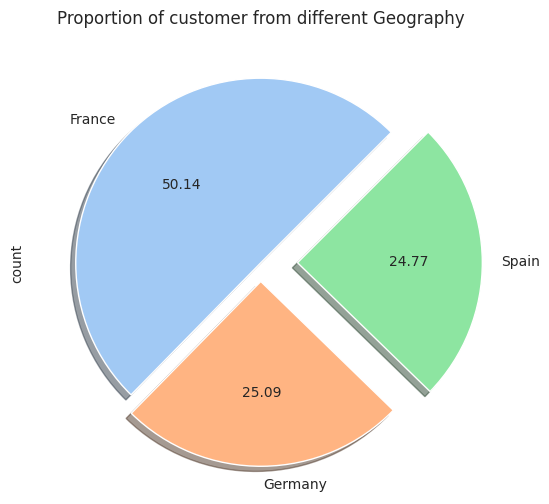

In [ ]:
value_counts = pd.value_counts(df['Geography'])
plt.figure(figsize = (6,6))
value_counts.plot(kind = 'pie', explode = [0,0.1,0.2],autopct='%.2f', shadow=True,startangle=45)
plt.title('Proportion of customer from different Geography')
plt.show()

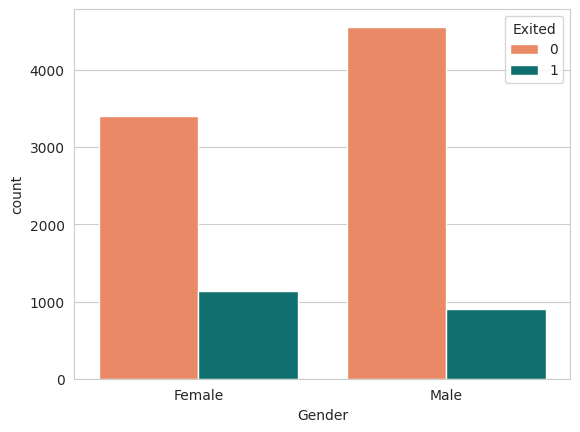

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


In [ ]:
sns.countplot(x="Gender",hue="Exited",palette=["coral","teal"],data=df)
plt.show()
pd.crosstab(df["Gender"],df["Exited"])

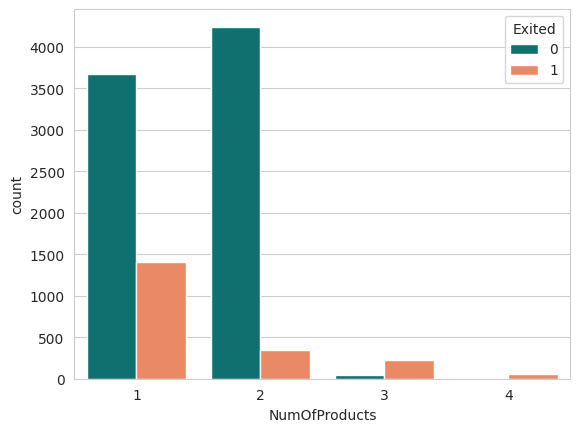

Exited,0,1
NumOfProducts,,
1,3675,1409
2,4242,348
3,46,220
4,0,60


In [ ]:
sns.countplot(x="NumOfProducts",hue="Exited",palette=["teal","coral"],data=df)
plt.show()
pd.crosstab(df["NumOfProducts"],df["Exited"])

<Axes: xlabel='Exited', ylabel='Age'>

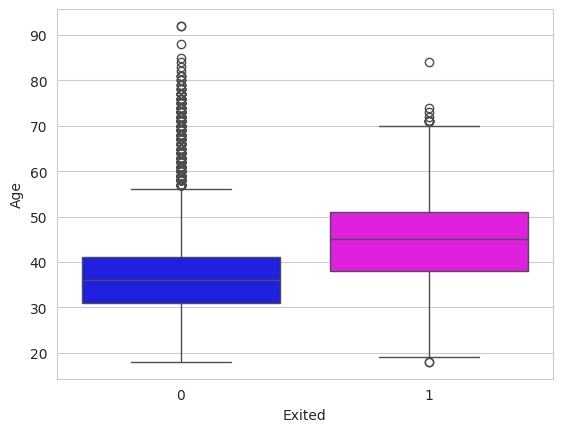

In [ ]:
sns.boxplot(x="Exited",y="Age",palette=["blue","magenta"],data=df)

<Axes: xlabel='Age', ylabel='Balance'>

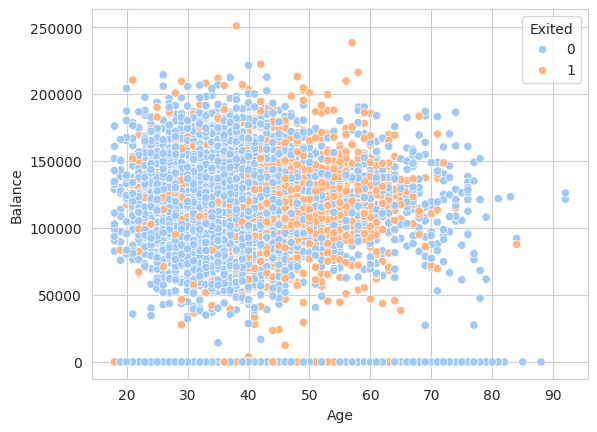

In [ ]:
sns.scatterplot(x="Age",y="Balance",hue="Exited",data=df)

<Axes: xlabel='Age', ylabel='CreditScore'>

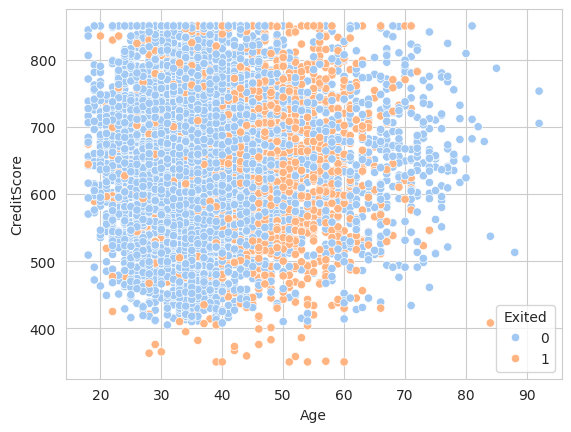

In [ ]:
sns.scatterplot(x = "Age", y = "CreditScore", hue = "Exited", data = df)

<Axes: xlabel='CreditScore', ylabel='Density'>

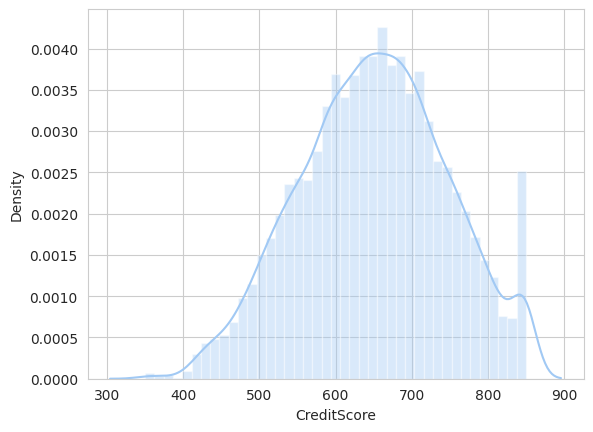

In [ ]:
sns.distplot(df["CreditScore"])

<Axes: xlabel='Age', ylabel='Density'>

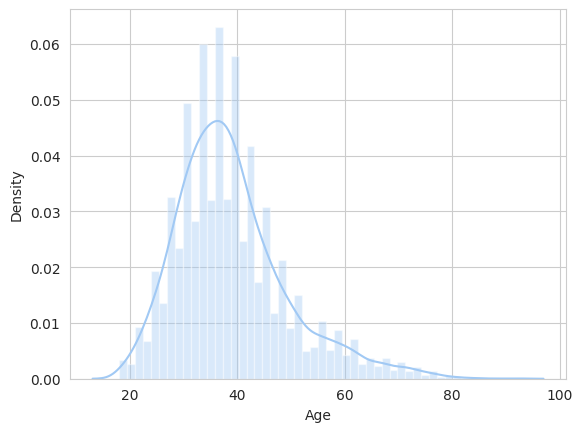

In [ ]:
sns.distplot(df["Age"])

<Axes: xlabel='Tenure', ylabel='Density'>

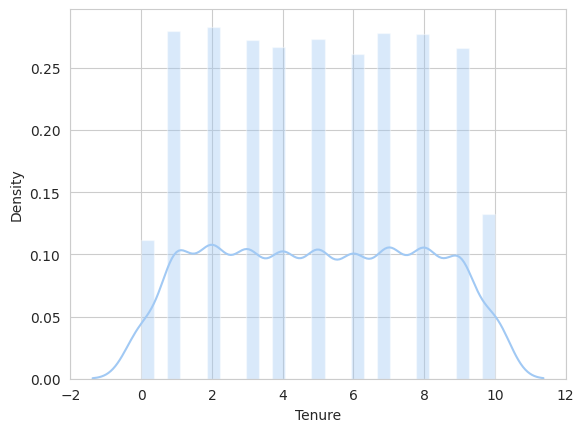

In [ ]:
sns.distplot(df["Tenure"])

<Axes: xlabel='Balance', ylabel='Density'>

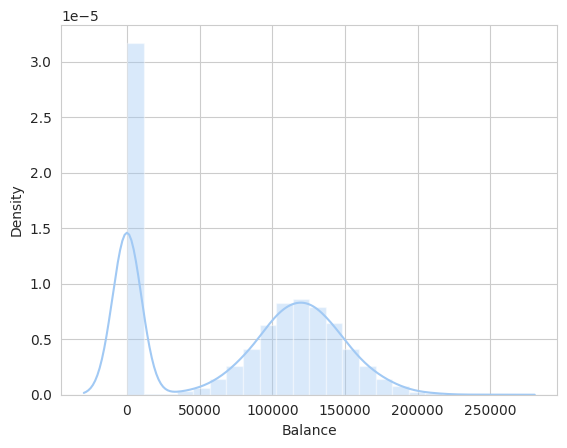

In [ ]:
sns.distplot(df["Balance"])

#Heatmap

<Axes: >

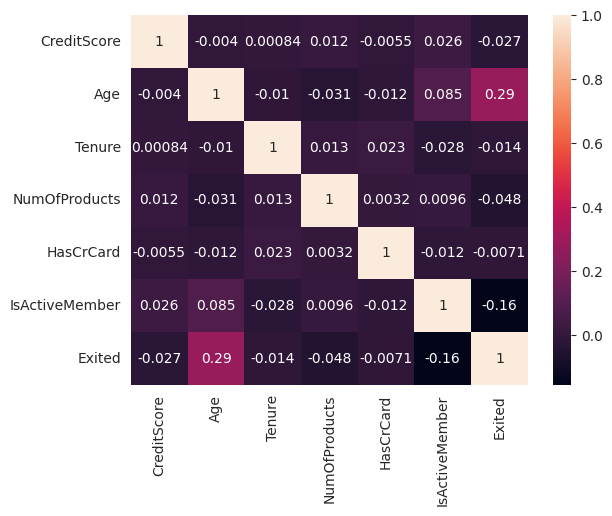

In [ ]:
numerical_columns=df.select_dtypes(include=['int64'])
sns.heatmap(data=numerical_columns.corr(),annot=True)

#Outliers

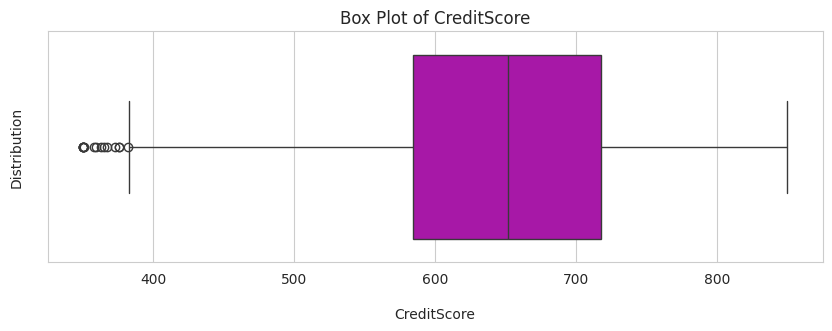

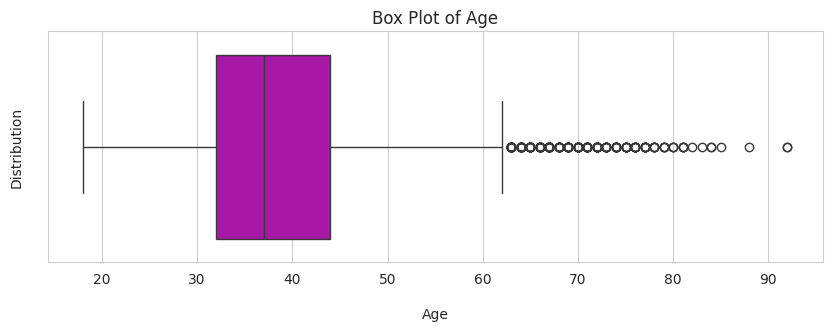

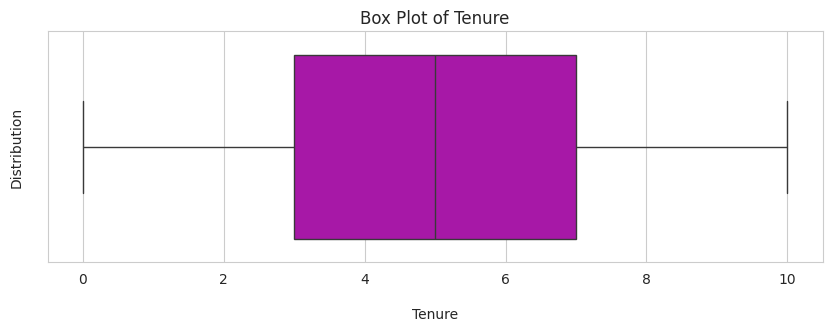

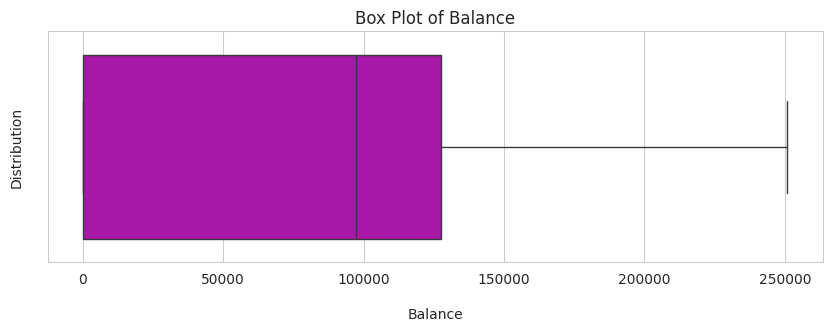

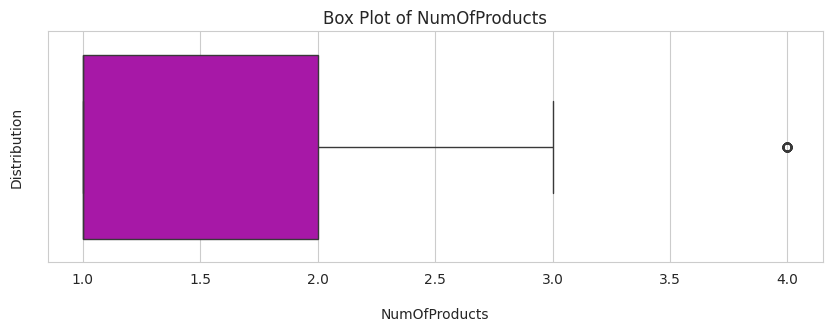

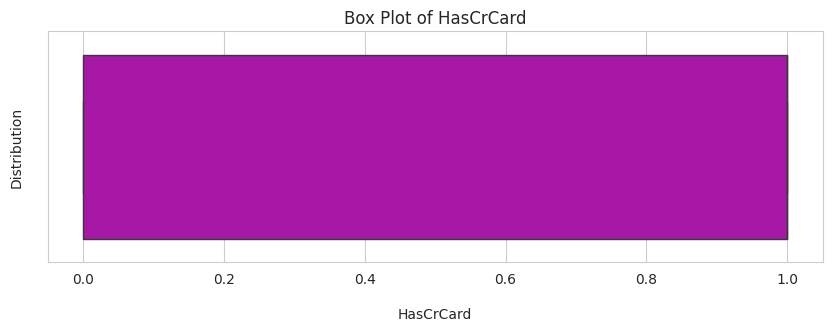

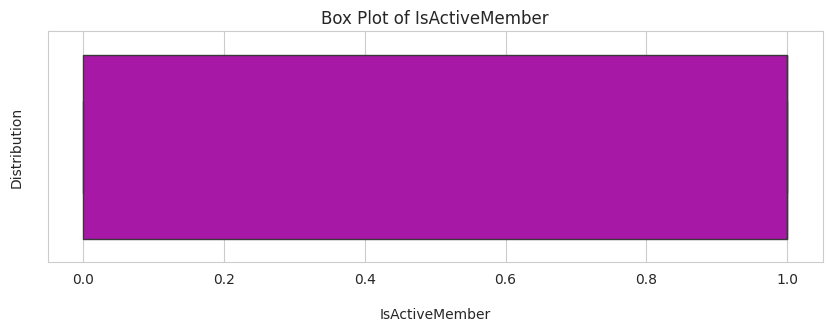

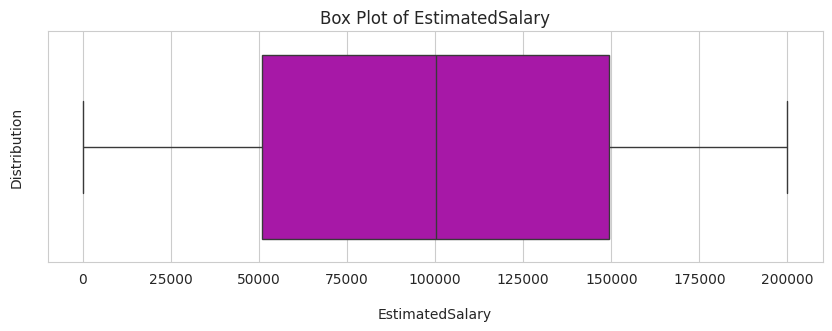

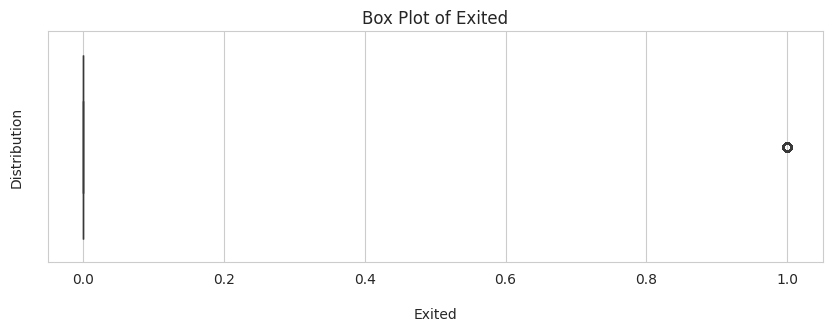

In [ ]:
for i in enumerate(df.select_dtypes(exclude=['object']).columns):
    plt.figure(figsize=(10,3))

    title_ = "Box Plot of " + str(i[1])
    plt.subplot(1, 1, 1)
    sns.boxplot(x = str(i[1]), data = df, color = 'm')
    plt.title(title_)
    plt.xlabel(str(i[1]), labelpad = 15)
    plt.ylabel("Distribution", labelpad = 10)

    plt.show()

#Models

In [ ]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
duplicate=df.duplicated()
duplicate.sum()

0

In [ ]:
df=pd.get_dummies(columns=["Geography","Gender"],data=df)

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


In [ ]:
x=df.drop("Exited",axis=1)

In [ ]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False


In [ ]:
y=df["Exited"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

#Logistic Regression

In [ ]:
model_1=LogisticRegression()

In [ ]:
model_1.fit(x_train,y_train)

LogisticRegression()

In [ ]:
model_1.score(x_train,y_train)

0.7938571428571428

In [ ]:
model_1.score(x_test,y_test)

0.7863333333333333

#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_2=DecisionTreeClassifier(max_depth=8)

In [ ]:
model_2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8)

In [ ]:
model_2.score(x_train,y_train)

0.8855714285714286

In [ ]:
model_2.score(x_test,y_test)

0.855

#Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model_5=GradientBoostingClassifier(learning_rate=0.5)

In [ ]:
model_5.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.5)

In [ ]:
model_5.score(x_train,y_train)

0.9151428571428571

In [ ]:
model_5.score(x_test,y_test)

0.8553333333333333

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_6=RandomForestClassifier(n_estimators=50,max_depth=3)

In [ ]:
model_6.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=50)

In [ ]:
model_6.score(x_train,y_train)

0.8241428571428572

In [ ]:
model_6.score(x_test,y_test)

0.816